In [ ]:
import pandas as pd
from DataTransform import DataTransform
from DataFrameInfo import DataFrameInfo
from DataFrameTransform import DataFrameTransform
from Plotter import Plotter


In [ ]:
transformer = DataTransform()

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [ ]:
df = pd.read_csv('/Users/moustafarashed/EDA_Projects/exploratory-data-analysis---customer-loans-in-finance410/loan_payments.csv')

In [ ]:
df.head()

In [138]:
unique_count = df.nunique()

# Creating a DataFrame to display column names and their unique value counts
unique_count_df = pd.DataFrame({'Column Name': unique_count.index, 'Unique Values Count': unique_count.values})

# Displaying the DataFrame
print(unique_count_df)

                   Column Name  Unique Values Count
0                           id                54231
1                    member_id                54231
2                  loan_amount                 1083
3            funded_amount_inv                 5261
4                   instalment                19940
5                        grade                    7
6                    sub_grade                   35
7               home_ownership                    5
8                   annual_inc                 6132
9          verification_status                    3
10                  issue_date                   61
11                 loan_status                    9
12                payment_plan                    2
13                     purpose                   14
14                         dti                 3611
15                 delinq_2yrs                   16
16        earliest_credit_line                  587
17              inq_last_6mths                   24
18          

In [ ]:
categorical_columns = ['term', 'grade','sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status','payment_plan', 'purpose', 'policy_code', 'application_type']

In [ ]:
df = transformer.convert_to_categorical(df, categorical_columns)

In [ ]:
date_time_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date'	,'last_credit_pull_date']

In [ ]:
df = transformer.convert_to_datetime(df, date_time_columns)

In [ ]:
numeric_columns = ['funded_amount','annual_inc', 'mths_since_last_delinq',	'mths_since_last_record','mths_since_last_major_derog']

In [ ]:
df = transformer.convert_to_numeric(df, numeric_columns)

In [ ]:
nan_counts = df[numeric_columns].isna().sum()
nan_counts

In [ ]:
df_info  = DataFrameInfo(df)

In [ ]:
print(df_info.check_data_types())
print(df_info.statistical_values())
#print(df_info.count_distinct_values())

print(df_info.null_values())
print(df_info.percentage_null_values())
df_info.print_df_shape()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
correlation_matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [ ]:
df_transform = DataFrameTransform(df)

In [ ]:
column_to_drop = ['funded_amount', 'term', 'int_rate', 'employment_length', 'mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date','mths_since_last_major_derog']


In [ ]:
#file keeps freezing when i use the method in the class, so i directly used pandas to handle the missing values
df = df.drop(columns=column_to_drop, axis=1)
#how can i use the p value to check the MCAR????

In [ ]:
df.head()

In [97]:
df.isnull().sum()

id                             0
member_id                      0
loan_amount                    0
funded_amount_inv              0
instalment                     0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_date                     0
loan_status                    0
payment_plan                   0
purpose                        0
dti                            0
delinq_2yrs                    0
earliest_credit_line           0
inq_last_6mths                 0
open_accounts                  0
total_accounts                 0
out_prncp                      0
out_prncp_inv                  0
total_payment                  0
total_payment_inv              0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_payment_date              0
last_payme

In [ ]:
df['last_payment_date'].fillna(df['last_payment_date'].mode()[0], inplace=True)

In [ ]:
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(), inplace=True)

In [ ]:
df['last_credit_pull_date'].fillna(df['last_credit_pull_date'].mode()[0], inplace=True)

In [ ]:
# Create an instance of the Plotter class
plotter = Plotter()

# Assuming 'df' is your DataFrame, pass it to the visualize_nulls method
plotter.visualize_nulls(df)

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
for i in numeric_cols:
    print(i)

In [ ]:
skewed_columns = [col for col in numeric_cols if df[col].skew() > 0.5]
skewed_columns

In [ ]:
skewness  = numeric_cols.skew()
skewness

In [ ]:
skewness  = df[skewed_columns].skew()
skewness

In [ ]:
for col in numeric_cols:
    df[col] = np.log1p(df[col])

In [ ]:
new_skewness = df[skewed_columns].skew()
new_skewness

In [ ]:
plotter.visualize_skew(df)

In [ ]:
plotter.visualize_skew_sns(df, skewed_columns)

In [ ]:
for col in skewed_columns:
    if df[col].skew() > 0.5:  # threshhold
        df[col] = np.log1p(df[col]) 

In [ ]:
plotter.visualize_skew_sns(df, skewed_columns)

In [ ]:
plotter.visualize_outliers(df, numeric_cols)

In [ ]:
cleaned_numeric_column = transformer.remove_outliers(df, numeric_cols)

In [ ]:
plotter.visualize_outliers(df, cleaned_numeric_column)

In [ ]:
numeric_cor = numeric_cols.corr()
numeric_cor

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_cor, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Numeric columns correlation after handling nulls')
plt.show()

In [ ]:
corr_threshhold = 0.90
# Create a mask to identify highly correlated features
upper = numeric_cor.where(np.triu(np.ones(numeric_cor.shape), k=1) == 1)
highly_correlated_columns = [column for column in upper.columns if any(upper[column] > corr_threshhold)]


In [ ]:
print("Highly Correlated Columns:", highly_correlated_columns)


In [ ]:
#df_without_highly_correlated_columns = df.drop(highly_correlated_columns, axis=1)


In [ ]:
#df_without_highly_correlated_columns.head()

In [91]:
#calculate the total recovery percantage and total funded percentage using the funded_amount_inv as the funded amount column has been removed in the transformation
#df['recovery_percentage'] = (df['recoveries']/df['funded_amount_inv'])*100
#df['total_payment_percentage'] = (df['total_payment']/df['funded_amount_inv'])*100

#filtered_recovery = df['recovery_percentage'][np.isfinite(df['recovery_percentage'])]
#filtered_total_payment = df['total_payment_percentage'][np.isfinite(df['total_payment_percentage'])]

In [135]:
total_recovery = df['total_rec_prncp'].sum()
total_funded = df['loan_amount'].sum()
print('Total recovery = ',total_recovery,' Total funded = ', total_funded)

Total recovery =  479031.68205856124  Total funded =  503619.5976426212


In [136]:
for i in df:
    print(i)

id
member_id
loan_amount
funded_amount_inv
instalment
grade
sub_grade
home_ownership
annual_inc
verification_status
issue_date
loan_status
payment_plan
purpose
dti
delinq_2yrs
earliest_credit_line
inq_last_6mths
open_accounts
total_accounts
out_prncp
out_prncp_inv
total_payment
total_payment_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_payment_date
last_payment_amount
last_credit_pull_date
collections_12_mths_ex_med
policy_code
application_type
recovery_percentage
total_payment_percentage


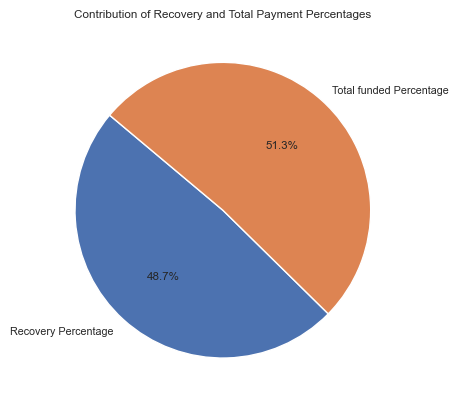

In [137]:

# Data for the pie chart
percentages = [total_recovery, total_funded]
labels = ['Recovery Percentage', 'Total funded Percentage']

# Plotting the pie chart
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Recovery and Total Payment Percentages')
plt.show()


In [153]:

# Get the maximum date from the last_payment_date column
max_date = df['last_payment_date'].max()

# Calculate 6 months in the future from the maximum date
six_months_future = max_date + pd.DateOffset(months=6)

# Filter loans with last_payment_date within the next 6 months
loans_within_six_months = df[df['last_payment_date'] <= six_months_future]



# Calculate the percentage of total amount recovered within 6 months
recovery_percentage_within_six_months = (total_recovery / total_funded) * 100

print("Total Recovery Percentage within 6 months:", recovery_percentage_within_six_months)


Total Recovery Percentage within 6 months: 95.11776036930397


(54231, 37)

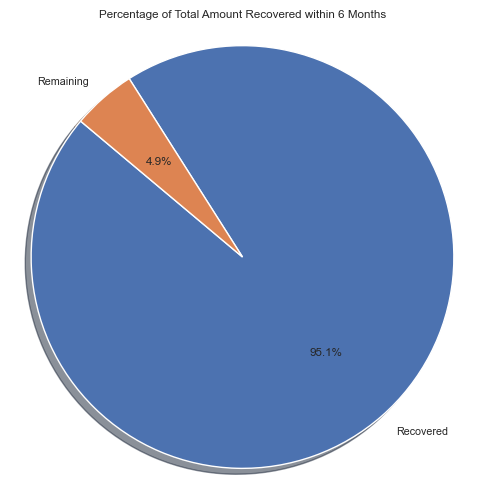

In [144]:


# Create a pie chart to visualize the recovery percentage
labels = ['Recovered', 'Remaining']
sizes = [recovery_percentage_within_six_months, 100 - recovery_percentage_within_six_months]

plt.figure(figsize=(6, 6))
plt.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Total Amount Recovered within 6 Months')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
